Type full names of participants of your team in the cell below

Participant 1: Daria Teplova\
Participant 2: Valeriia Kuka

## Guideines for submission

-- The deadline for submitting the notebook is on 7th of March 2021, at 22:00 St.Petersburg time;\
-- The defense will presumably happen on 13th of March, more information will follow;\
-- You should send your notebook (and any other relevant files) to yuliya.shapovalova@ru.nl with the subject of e-mail "PML 2021 final assignment";\
-- The assignment can be done with maximum 3 people in a team;\
-- You are allowed to use course materials (lectures/tutorials) and recommended literature to complete this assugnment;\
-- You are not allowed to use resources from github or similar platform, you code has to be geniuine.
-- There are 6 exercises in total, you can get 20 points for the exercises 1-5 and extra 10 points for the exercise 0. In total this gives you a possibility to earn 110 points for the final assignment. To pass the course you need to earn at least 60 points. You also might be asked to defend your assignment, presumable date for the defense is on the 13th of March. More information will follow.  


#### Note! Your notebook should be reproducible. Before submitting it, make sure to restart the kernel and run through all the cells to check that you are not getting any errors.

#### Good luck! Try to learn as much, collaborate within your team, try to keep up good team dynamics and get in touch if something isn't clear. 


## Exercise 0: conceptual difference between frequentists and Bayesian line of thought

Discuss below what is conceptual difference between frequentists explanation of the concept of probability and Bayesian. 

How does inference (i.e. learning the model parameters/distributions) differ in frequentists and Bayesian approaches? When would you choose which approach? 

In which types of models, for example? 

What would you rather choose when you have a large data set? 

When would you simply choose loss function and minimize that loss function? 

### Answer

#### Frequentists
Frequentists interpret probabilities in terms of frequencies of random repeatable events. They assume fixed model parameter and the prediction is rather point estimate not the whole distribution of a parameter. 

Inference:
- Construct an estimator that is a function of the data
- Study statistical properties of estimators in similar experiments,
each time with different datasets, estimate $p$-values and confidence intervals. Chckh hypothesises.
- So, their inference is based on the concept of repeatable events.

#### Bayesian approach
Bayesian line of though consists of probabilities as subjective beliefs about uncertain event

1) not neccessarily repeatable events

2) event may yield only indirect observations

3) can make inference for a particular dataset

4) assume parameters are random variables


Inference:
- Choose a prior belief p(θ), and apply Bayes rule to compute posterior.
- Bayesians can talk about the belief that $θ$ has a certain value given the particular data set.
- They use available number of observations to make inference about model parameters and they estimate the posterior distribution of model parameters. 

$NB:$ Some points are tacken from lectures.



In [2]:
# Import necessary libraries for the assignment, some more will follow later
import numpy as np
import pylab as plt
%matplotlib inline
np.random.seed(2021)

## Exercise 1: Bayesian inference for the mean of Gaussian distribution 

<h2>Bayesian Inference of the mean of a Gaussian</h2>
<p>In this exercise, we will use Bayesian inference to learn (infer) the mean of a Gaussian. We assume that we observe $N$ values that have come from a Gaussian with mean $\mu$ and variancs $\sigma^2$, i.e. $x_i\sim N(\mu, \sigma^2)$. We assume that $\sigma^2=1$ and is known. The tast is to learn the mean $\mu$.</p>

<p>We start by defining a prior density on $\mu$. We will use a Gaussian as our likelihood will be Gaussian (as per our assumption above) and the Gaussian prior is conjugate to the Gaussian likelihood. We choose the prior with mean $a=0$ and variance $b^2=1$. This choice is arbitrary in this case. Note, however, that in real-world inference problems you should be careful with defining your prior distribution. </p>

### Question 1: what does conjugacy of the prior and the likelihood mean? What is the advantage of choosing a conjugate prior? 

### Answer

It means that both prior and posterior distributions are part of the same family of distributions. Choosing a conjugate prior for the likelihood function guarantees that the posterior is of the same form/type as the prior. 

Posterior interpreted as updated prior: sequential learning.
Advantages of choosing a conjugate prior:
1) simplicity of calculation (easy evaluate the effects of the observed data on inference)\
2) interpretability (the posterior in a conjugate model is easily summarized and understood)\
3) mixtures are still conjugate

### Let us define some values for the data generation and for the inference; note, x is our data here!

In [ ]:
true_mu = 2.0 # true value of mu which is unknown
prior_mean = 0         # prior hyperparameter
prior_sigma = 1      # prior hyperparameter
sig_sq = 1 
x = np.random.normal(true_mu,np.sqrt(sig_sq),(10,1)) # Our data 

### Question 2

<p>Because we chose a conjugate prior-likelihood pair, we are able to compute the posterior analytically. From Bayes rule, we have:
$$ p(\mu|x_1,\ldots,x_N,a,b^2,\sigma^2) = \frac{p(x_1,\ldots,x_N|\mu,\sigma^2)p(\mu|a,b^2)}{p(x_1,\ldots,x_N|\sigma^2,a,b^2)}$$
The likelihood term can be factorised as:
$$
p(x_1,\ldots,x_N|\mu,\sigma^2) = \prod_{i=1}^N p(x_i|\mu,\sigma^2) = \prod_{i=1}^N {\cal N}(x_i|\mu,\sigma^2)
$$</p>
<p>Use Bayes' in proportionality terms to derive the posterior distribution of $\mu$, i.e. use 
$$ p(\mu|x_1,\ldots,x_N,a,b^2,\sigma^2) \propto p(x_1,\ldots,x_N|\mu,\sigma^2)p(\mu|a,b^2)$$. </p>
<p>Note that we defined both the prior and the likelihood as Gaussian. Detailed derivations and explanations are expected here. Only the final answer is not sufficient to get maximum points in this exercise.</p> 

### Answer

The main formula to compute posterior distribution is 

$$ p(\mu|x_1,\ldots,x_N,a,b^2,\sigma^2) \propto p(x_1,\ldots,x_N|\mu,\sigma^2)p(\mu|a,b^2)$$

We can compute both $p(x_1,\ldots,x_N|\mu,\sigma^2)$ and $p(\mu|a,b^2)$ because we know prior. And then using them find the posterior.

First, compute $p(\mu|a,b^2)$:

1. Recall genaral formula for Normal distribution probability density function with mean $\mu_0$ and variance $\sigma^{2}_0$ for a random variable $x$:

$$f(x) = \frac{1}{\sigma_0  \sqrt{2\pi}}\exp \left\{-\frac{(x-\mu_0)^2}{2\sigma^{2}_0}\right \} $$

2. Use that formula to compute probability density function with our given parameters $a$ and $b^2$, $p(\mu|a,b^2)$, for random variable $\mu$:

$$p(\mu|a,b^2) = \frac{1}{b \sqrt{2\pi}}\exp \left\{-\frac{(\mu - a)^2}{2\cdot b^2}\right\}$$

$$p(\mu|a = 0,b^2 = 1) = \frac{1}{\sqrt{2\pi}}\exp \left\{-\frac{\mu^2}{2}\right\}$$

Second, compute $p(x_1,\ldots,x_N|\mu,\sigma^2)$:

1.   For one $x_0$ (just for example):

$$p(x_0|\mu,\sigma^2) = \frac{1}{\sigma \sqrt{2\pi}}\exp \left\{-\frac{(x-\mu)^2}{2 \sigma^2}\right\}$$

$$p(x_0|\mu,\sigma^2=1) = \frac{1}{  \sqrt{2\pi}}\exp \left\{-\frac{(x-\mu)^2}{2}\right\}$$

2.   For $x_i$, $i \in \{1, \dots, N\}$:

$$p(x_1,\ldots,x_N|\mu,\sigma^2) = \prod\limits_{i=1}^{N} \frac{1}{\sigma \sqrt{2\pi}}\exp \left \{-\frac{(x_{i}-\mu)^2}{2 \sigma^2}\right\}$$

$$p(x_1,\ldots,x_N|\mu,\sigma^2=1) = \prod\limits_{i=1}^{N} \frac{1}{  \sqrt{2\pi}}\exp \left\{-\frac{(x_{i}-\mu)^2}{2}\right\}$$

Finally, find the product:

$$p(x_1,\ldots,x_N|\mu,\sigma^2=1) \times p(\mu|a = 0,b^2 = 1) = $$
$$ = \frac{1}{\sqrt{2\pi}}\exp \left\{-\frac{\mu^2}{2}\right\} \times \prod\limits_{i=1}^{N} \frac{1}{  \sqrt{2\pi}}\exp \left \{-\frac{(x_{i}-\mu)^2}{2}\right\} = $$

$$ = (\frac{1}{2\pi}) \exp \left \{-\frac{\mu^2}{2}\right\} \times \prod\limits_{i=1}^{N} \exp \left \{-\frac{(x_{i}-\mu)^2}{2}\right\} = $$

$$ = (\frac{1}{2\pi}) \exp \left \{-\frac{\mu^2}{2} - \sum_{n=1}^{N} \frac{(x_{i}-\mu)^2}{2} \right\}$$

### Question 3

<p>As the answer to the previous question your should have found that the posterior distribution is $N(c, d^2)$, where 

and
$$
d^2 = \left(\frac{1}{b^2} + \frac{N}{\sigma^2}\right)^{-1}
$$
and
$$
c = d^2\left(\frac{a}{b^2} + \frac{\sum_{i=1}^N x_i}{\sigma^2}\right)
$$
</p>
<p>
Use the function normal_pdf() defined below to </p>
<p>1) plot prior distribution; </p>
<p>2) plot posterior distribution after observing every additional data point (i.e. first plot posterior after observing first data point, then after observing second data point etc. until the last one). 
</p>
<p>3) Plot evolution of the posterior mean and variance, i.e. there should be two plots: a) on the x-axis N (number of data points included in the posterior computation) on the y-axis c -- the mean of the posterior computed with that number of data points; b) the same, but with $d^2$ (posterior variance) on the y-axis.  
</p>

### Answer

In [ ]:
def normal_pdf(x,mu,sigma):
    return (1.0/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1.0/(2.0*sigma**2))*(x-mu)**2)

Find maximum and minimum of our available data, just to see the scale of data

In [ ]:
print(np.amin(x))
print(np.amax(x))
print(np.mean(x))
print(x)

1.1934791869243893
3.4886090526695126
2.3094447957295516
[[3.48860905]
 [2.67601087]
 [1.58154863]
 [1.19347919]
 [2.55587583]
 [1.29449571]
 [3.13085826]
 [2.64500184]
 [2.10641374]
 [2.42215483]]


### Plot 1

Plot 1. Prior distribution

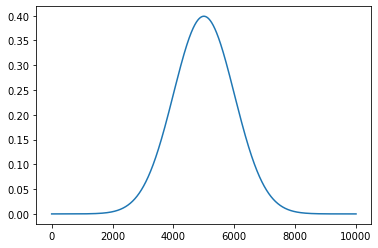

In [ ]:
# Plot 1
mu = np.arange(-5,5,0.001) #generate just some values for plotting
prior_distribution = normal_pdf(mu, prior_mean, prior_sigma)
plt.plot(prior_distribution)

### Plot 2

Plot 2 posterior distribution after observing every additional data point (i.e. first plot posterior after observing first data point, then after observing second data point etc. until the last one).

$$
d^2 = \left(\frac{1}{b^2} + \frac{N}{\sigma^2}\right)^{-1}
$$
and
$$
c = d^2\left(\frac{a}{b^2} + \frac{\sum_{i=1}^N x_i}{\sigma^2}\right)
$$ 

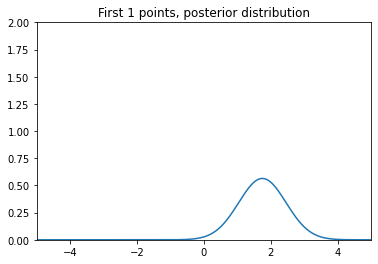

First 1 points Updated mean 1.7443045263347563 Updated sigma 0.5


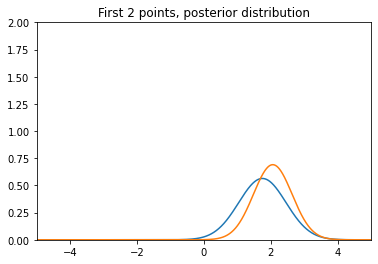

First 2 points Updated mean 2.0548733080239683 Updated sigma 0.3333333333333333


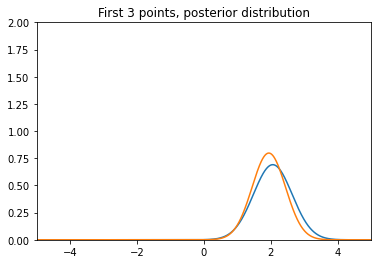

First 3 points Updated mean 1.9365421386487967 Updated sigma 0.25


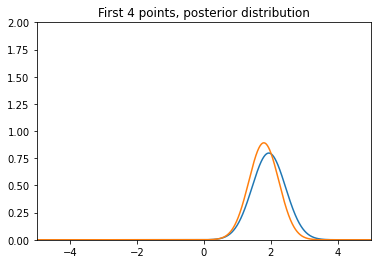

First 4 points Updated mean 1.7879295483039153 Updated sigma 0.2


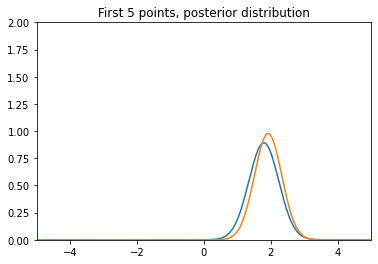

First 5 points Updated mean 1.9159205955065002 Updated sigma 0.16666666666666666


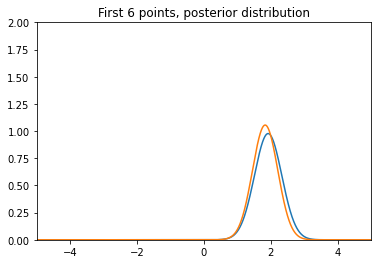

First 6 points Updated mean 1.8271456123700445 Updated sigma 0.14285714285714285


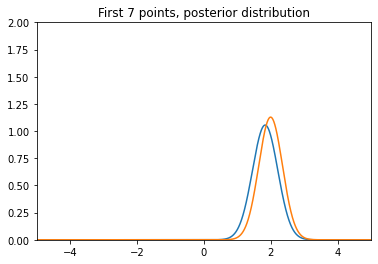

First 7 points Updated mean 1.9901096935797042 Updated sigma 0.125


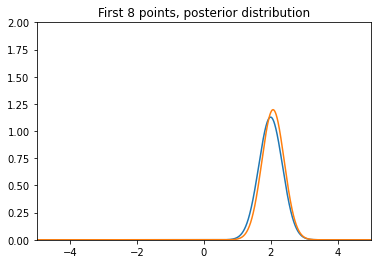

First 8 points Updated mean 2.062875487244626 Updated sigma 0.1111111111111111


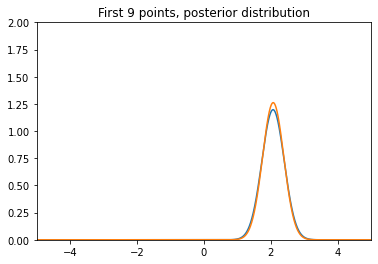

First 9 points Updated mean 2.0672293127753334 Updated sigma 0.1


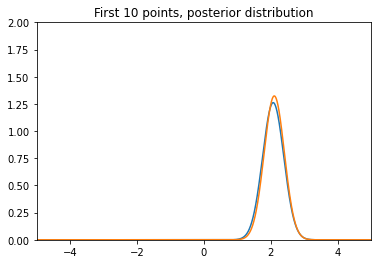

First 10 points Updated mean 2.099495268845047 Updated sigma 0.09090909090909091


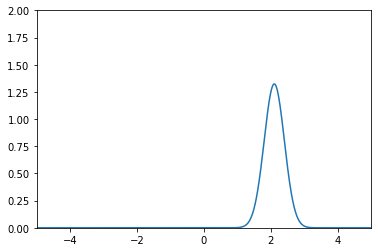

In [ ]:
# Plot 2 posterior distribution after observing every additional data point
i = 1
mu = np.arange(-5,5,0.001) #generate just some values for plotting
list_c = []
list_d = []
while i <= 10:
    sub_x = x[0:i]
    d_sq = ((1 / prior_sigma) + (i/sig_sq)) ** (-1)
    d_sqrt = d_sq ** (1/2)
    c = d_sq * ((prior_mean/prior_sigma) + (np.sum(sub_x)/sig_sq))
    list_c.append(c)
    list_d.append(d_sq)
    posterior_dist = normal_pdf(mu,c,d_sqrt)


    #On several plots (blue line -- old plot, orange line -- updated plot). Iterates over
    plt.title('First ' + str(i) + ' points, posterior distribution')
    plt.plot(mu, posterior_dist)
    plt.ylim([0,2])
    plt.xlim([-5,5])
    plt.show()
    
    
    plt.plot(mu, posterior_dist)
    plt.ylim([0,2])
    plt.xlim([-5,5])
    print('First '+str(i)+' points', 'Updated mean', c, 'Updated sigma', d_sq)
    
    i += 1

Plot evolution of the posterior mean and variance, i.e. there should be two plots: 

a) on the x-axis N (number of data points included in the posterior computation) on the y-axis c -- the mean of the posterior computed with that number of data points; 

b) the same, but with  $𝑑^2$  (posterior variance) on the y-axis.

### Plot 3 

Text(0.5, 1.0, 'Evolution of the posterior variance for different number of observations included')

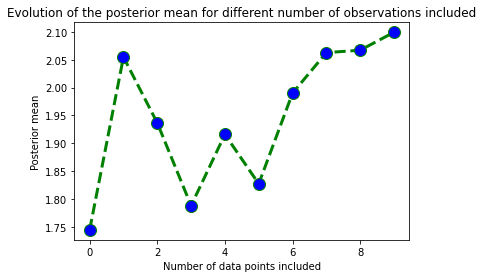

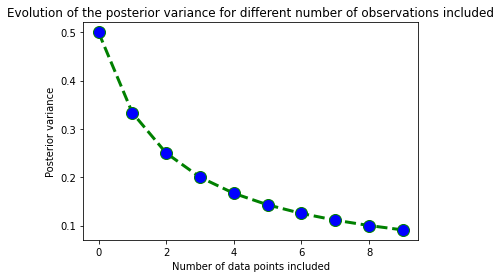

In [ ]:
# Plot 3 
N = np.array([*range(0,10)])

plt.figure()
plt.plot(N, np.array(list_c), color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
# naming the x axis 
plt.xlabel('Number of data points included') 
# naming the y axis 
plt.ylabel('Posterior mean')
plt.title('Evolution of the posterior mean for different number of observations included')

plt.figure()
plt.plot(N, list_d, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
# naming the x axis 
plt.xlabel('Number of data points included') 
# naming the y axis 
plt.ylabel('Posterior variance')
plt.title('Evolution of the posterior variance for different number of observations included')

### Question 4 

Compute (derive) maximum likelihood solution to this problem. 

### Answer

Likelihood function

$$L = p(x_1,\ldots,x_N|\mu,\sigma^2) = \prod_{i=1}^N p(x_i|\mu,\sigma^2) = \prod_{i=1}^N {\cal N}(x_i|\mu,\sigma^2)$$

Log likelihood

$$\log L = \sum_{i=1}^{N}log\left(\frac{1}{\sigma \sqrt{2\pi}}\exp \left \{ - \frac{(x_{i}-\mu )^2}{2\sigma^2} \right\}\right) =  \sum_{i=1}^{N} (\log 1 - \frac{1}{2}\log \sigma + \left(\left \{ - \frac{(x_{i}-\mu )^2}{2\sigma^2} \right\}\right)) = $$

$$= -\frac{N}{2} \log (2\pi) - N \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_{i}-\mu )^2 $$

Maximizing log likelihood gives us:

$$\log L = -\frac{N}{2} \log (2\pi) - N \log \sigma - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_{i}-\mu )^2 \longrightarrow \max_{{\mu}}$$

$$\frac{\partial \log L}{\partial \mu} = \frac{1}{2\sigma^2} \sum_{i=1}^{N} 2 (x_{i}-\mu ) = 0 $$

Which gives us solution:

$$\hat{\mu} = \frac{\sum_{i=1}^{N} x_{i}}{N}$$

### Question 5 

Although maximum likelihood is usually not considered in a sequential manner like Bayesian inference, it is useful to do a similar exercise for the intuition. Compute maximum likelihood solution after observing 1 data point, 2 data points, and so on until 10. Plot this result in the following manner: on x axis N - number of data points, on y axis mu_ml - maximum likelhood estimate computed with that number of data points. What difference do you see with the evolution of the posterior mean (if any)? Does that make sense? Why? 

### Answer

In [3]:
N = np.array([*range(0,10)])
i = 1
list_mu = []
while i <= 10:
    sub_x = x[0:i]
    mu_lh = (np.sum(sub_x))/i
    list_mu.append(mu_lh)
    i += 1

NameError: ignored

Text(0.5, 1.0, 'Evolution of the mean for different number of observations included')

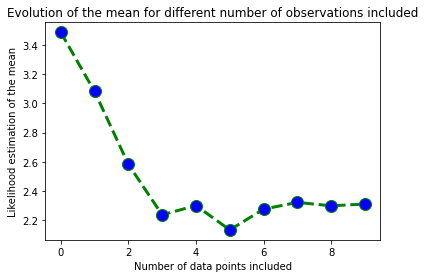

In [ ]:
plt.figure()
plt.plot(N, np.array(list_mu), color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
# naming the x axis 
plt.xlabel('Number of data points included') 
# naming the y axis 
plt.ylabel('Likelihood estimation of the mean')
plt.title('Evolution of the mean for different number of observations included')

What difference do you see with the evolution of the posterior mean (if any)? Does that make sense? Why? 

The intuition behind this behaviour of fuctions:

Maximum likelyhood estimates depend only on the number of observations and their sum. Maximum likelyhood estimate is (almost) linear in number of observations. The higher the number of observations, the lower the mean. So it stedily decreases.

$$\hat{\mu} = \frac{\sum_{i=1}^{N} x_{i}}{N}$$

In the case of posrterior mean (Bayesian approach) it is more complex and includes also prior mean, prior variance and posterior variance. First two does not change with the number of observations while posterior variance udates when we add oservations $\Rightarrow$ posterior mean changes with the change:

- in number of observations
- in posterior variance

Posterior mean fluctuates with number of observations, it is more complex estimate than maximum likelyhood estimate.

$$
d^2 = \left(\frac{1}{b^2} + \frac{N}{\sigma^2}\right)^{-1}
$$

$$
c = d^2\left(\frac{a}{b^2} + \frac{\sum_{i=1}^N x_i}{\sigma^2}\right)
$$

## Exercise 2: Regularized regression

In this exercise you will demonstrate the effect of the regularization term in the regression task. 
The regression model we have considered was written as
$$t_{i} = \sum_{k=0}^{K}w_{k}x^{k} +\epsilon_{i}$$, where $K$ is the maximal polynomial order we are considering and $i=1, \dots, N$ -- number of data points.
In matrix notation we have:
$$\mathbf{t} = \mathbf{X}\mathbf{w} + \mathbf{\epsilon} $$. 
<p>Our original squared loss function in matrix/vector without regularization was defined as:
$$ L = \frac{1}{N} (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
We defined the loss function with the regularization term as:
$$ L = \lambda \mathbf{w}^T\mathbf{w} + \frac{1}{N}(\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$.

### Question 1

What does $\lambda$ control for? Find the optimal soultion for the regularized loss function (i.e. derive it).  

### Answer
Parameter $\lambda$ controls the trade-off between penalising not fitting the
data well and penalizing overly complex models. 
$$L = \lambda w^Tw + \frac{1}{N} (t-Xw)^T (t-Xw) = \lambda w^Tw  \frac{1}{N}w^TX^TXw - \frac{2}{N}w^TX^Tt + \frac{1}{N}t^Tt $$

Taking partial derivatives with respect to w,

$$ \frac{2}{N}X^TXw - \frac{2}{N}X^Tt + \frac{2}{N}\lambda w = 0$$


$$ w = (X^TX + N \lambda I)^{-1} X ^Tt$$

### Question 2 

<p>
Now we will try to illustrate the role of this additional term. We will generate data from a quadratic function and add some Gaussian noise. 
</p> 

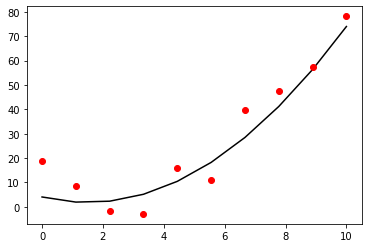

In [4]:
x = np.linspace(0,10,10)[:,None]
y = x**2 - 3*x + 4                         # true function
t = y + np.random.normal(0,10,(x.size,1))  # our observations with noise
plt.plot(x,y,'k')
plt.plot(x,t,'ro')

In [6]:
x

array([[ 0.        ],
       [ 1.11111111],
       [ 2.22222222],
       [ 3.33333333],
       [ 4.44444444],
       [ 5.55555556],
       [ 6.66666667],
       [ 7.77777778],
       [ 8.88888889],
       [10.        ]])

Create matrix $\mathbf{X}$ assuming that the maximal polynomial order in polynomial regression is 7. 

### Answer

In [7]:
max_order = 7
X = np.ones_like(x)
for i in np.arange(max_order):
    X = np.hstack((X,x**(i+1)))

In [8]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e+00, 1.23456790e+00, 1.37174211e+00,
        1.52415790e+00, 1.69350878e+00, 1.88167642e+00, 2.09075158e+00],
       [1.00000000e+00, 2.22222222e+00, 4.93827160e+00, 1.09739369e+01,
        2.43865264e+01, 5.41922810e+01, 1.20427291e+02, 2.67616202e+02],
       [1.00000000e+00, 3.33333333e+00, 1.11111111e+01, 3.70370370e+01,
        1.23456790e+02, 4.11522634e+02, 1.37174211e+03, 4.57247371e+03],
       [1.00000000e+00, 4.44444444e+00, 1.97530864e+01, 8.77914952e+01,
        3.90184423e+02, 1.73415299e+03, 7.70734663e+03, 3.42548739e+04],
       [1.00000000e+00, 5.55555556e+00, 3.08641975e+01, 1.71467764e+02,
        9.52598689e+02, 5.29221494e+03, 2.94011941e+04, 1.63339967e+05],
       [1.00000000e+00, 6.66666667e+00, 4.44444444e+01, 2.96296296e+02,
        1.97530864e+03, 1.31687243e+04, 8.77914952e+04, 5.

### Question 3

Now let us create a test matrix $\mathbf{X}^{\ast}$ in which we would make predictions.

In [ ]:
maxorder = 7
x_test = np.linspace(0,10,30)[:,None]
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1):
    X_test = np.hstack((X_test,x_test**i))

Take different values of $\lambda$: 0,0.01,0.1,1,10,100. For all of these values 

1) find optimal parameter values; 

2) make predictions of your target values in the test points $\mathbf{X}^{\ast}$ and plot them (also include the plot of original noisy data points). 

### Answer

$ w = (X^TX + N \lambda I)^{-1} X ^Tt$

In [ ]:
lambd = [0, 0.01, 0.1, 1, 10, 100]
dict_w = {}
dict_predictions = {}
for i in lambd:
    w_opt = np.dot(np.dot(np.linalg.inv(np.add(np.dot(X.T, X), len(X)*i*np.identity(len(X[0])))), X.T), t)
    dict_w[i] = w_opt
    predicted = np.dot(X_test, w_opt)
    dict_predictions[i] = predicted

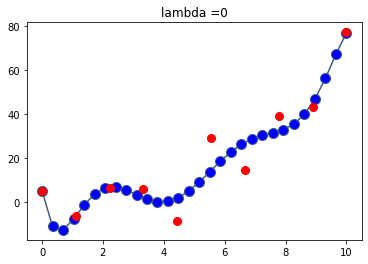

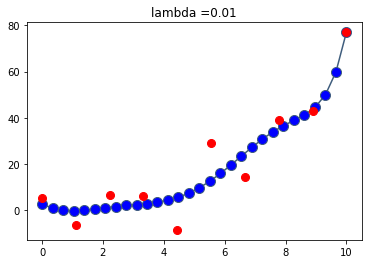

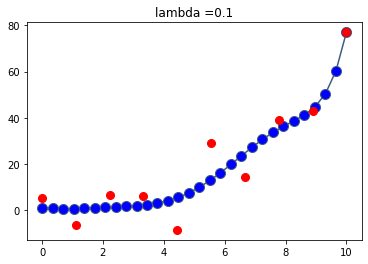

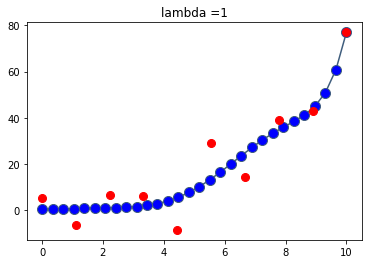

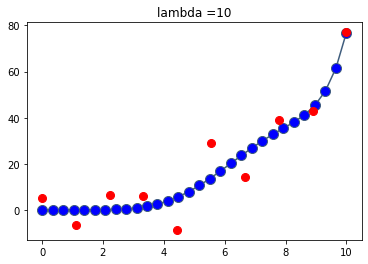

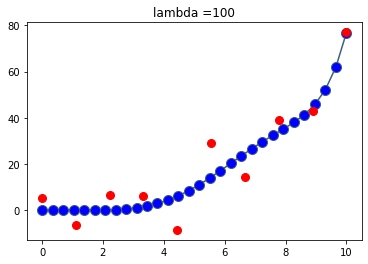

In [ ]:
for i in dict_predictions.keys():
    plt.plot(x_test, dict_predictions.get(i),color="#3F5D7D", marker='o', markerfacecolor='blue', markersize=10)
    plt.plot(x, t,'ro', markersize=8)
    plt.title('lambda ='+ str(i))
    plt.show()

### Question 4

Interpret the results from previous question. What effect does $\lambda$ have on the predicted function? Do high/low values of $\lambda$ correspond to simpler functions? Why? 

### Answer
$\lambda$ represents a trade-off between complexity (which may result in overfitting) and not fittin the given data.

High values of $\lambda$ correspond to simpler functions because $\lambda$ penalizes overcomplexity. More complex models fit the data well but can give overfitting prediction. Predicted function becomes more flatten while increasing $\lambda$ and fits data worse than with lower $\lambda$s.

## Exercise 3: gradient descent

Recall gradient descent algorithm for minimization of a function. Let $E(\mathbf{x})$ be a function that we want to minimize. Then one iteration of gradient descent is
$$\mathbf{x}_{n+1} = \mathbf{x}_{n} - \eta \nabla E(\mathbf{x}) $$ with $\eta$ being learning rate. \
Let us take the following function 
$$ h(x,y)=100(y−x^2)^2 +(1−x)^2 $$

In [ ]:
# You will need 3D plotting here
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

### Question 1

Take the grid of points for x and y defined below and plot function $h(x,y)$ over this grid of points. 

In [ ]:
x = np.linspace(-2,2,20)
y = np.linspace(-1,3,20)
[x_grid, y_grid] = np.meshgrid(x,y)

### Answer

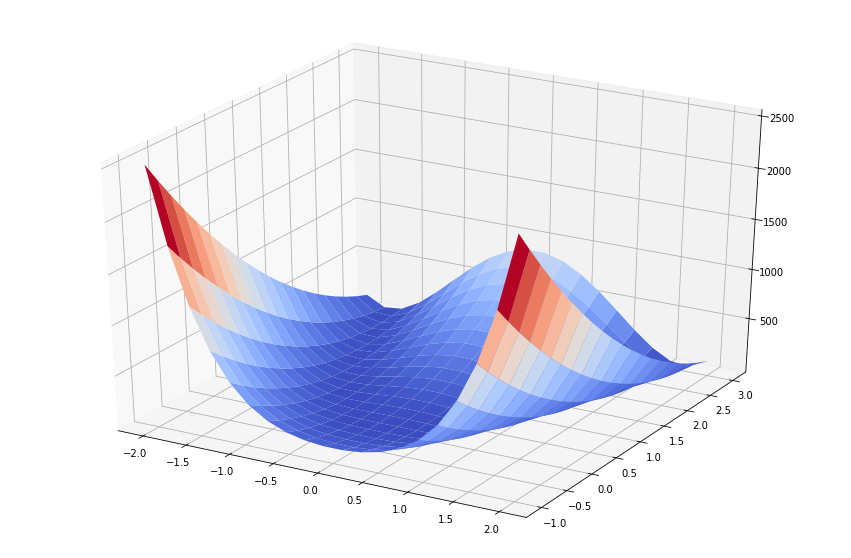

In [ ]:
h = 100*(y_grid - x_grid**2)**2  + (1 - x_grid)**2

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, h,cmap=cm.coolwarm)

### Question 2

Find the minimum of function $h(x,y)$ (analytically) and prove that it is indeed a minumum.

### Answer
To find the minimum point, it is necessary to find the derivatives with respect to x and y:
$$ L_{x}'= -400x(y-x^2)^2 +2x -2 = 0 $$

$$ L_{y}'= 200y -200x^2 = 0 $$


From the second one:

$ 200y = x^2 $

We plug this into the first equation:

$-400x(x^2-x^2)^2 +2x -2 = 0 $

$2x = 2 $

$x = 1 $; $y = 1 $.

 To prove that we found a minimum at (1,1) we will calculate components of symmetric Hessian matrix:

$$\frac{\partial^2{L}}{\partial{x}\partial{y}} = -400x = -400 $$

$$\frac{\partial^2{L}}{\partial{x^2}} = 1200x^2 -400y + 2 = 802 $$

$$\frac{\partial^2{L}}{\partial{y^2}} = 200 $$

The first corner minor of the matrix ($\frac{\partial^2{L}}{\partial{x^2}} = 802 > 0 $) 

The second is also greater than zero $(802*200 - (-400^2) = 400)$


Since the minors of the matrix are positive definite, it means that we have found a local minimum at the point (1,1).

### Question 3

### Answer

Write down iteration rule of gradient descent for this function:

$x_{n+1} = x_{n} - \eta* grad_{x} = x_{n} -\eta( -400x_{n}(y_{n}-x_{n}^2)^2 +2x_{n} -2) = x_{n} + 400\eta x_{n}(y_{n}-x_{n}^2)^2 - 2\eta x_{n} + 2\eta $

$y_{n+1} = y_{n} - \eta* grad_{y} = y_{n} - 200\eta*(y_{n} -x_{n}^2) $

### Question 4

Create function that runs gradient descent algorithm to minimize function h(x,y). 

### Answer

In [ ]:
def gradient_descent(eta=0.001, num_iterations=1000):
    """
    num_iterations -- number of iterations of the algorithm;
    eta -- learning rate;
    """
    x_init = 1  # Your initial starting point of the algorithm
    y_init = -1 # Your initial starting point of the algorithm
    # Store lists for plotting later
    x_list = []
    y_list = []
    x_list.append(x_init)
    y_list.append(y_init)
    for iteration in range(num_iterations):
      gradients_x = -400*x_init*(y_init - x_init**2) + 2*x_init -2
      gradients_y = 200*(y_init - x_init**2)
      x_init = x_init - eta * gradients_x
      y_init = y_init - eta * gradients_y
      x_list.append(x_init)
      y_list.append(y_init)

      h = 100*(y_init - x_init**2)**2  + (1 - x_init)**2
      
    return x_list, y_list, h  # should return optimal list/array of values x and y which the algorithm has visite

### Question 5

Using the function you have created, try different values of $\eta$ (sometimes it also would make sense to change num_iterations to arrive to a meaningful comclusion). What do you notice in the performance of the algorithm? Does it ever converge to the correct minimum? Why or why not? Illustrate your findings by plotting a) the function itself as before, the path of the values algorithm takes, the true minimum (for different values of $\eta$). 

(YOUR ANSWER HERE)

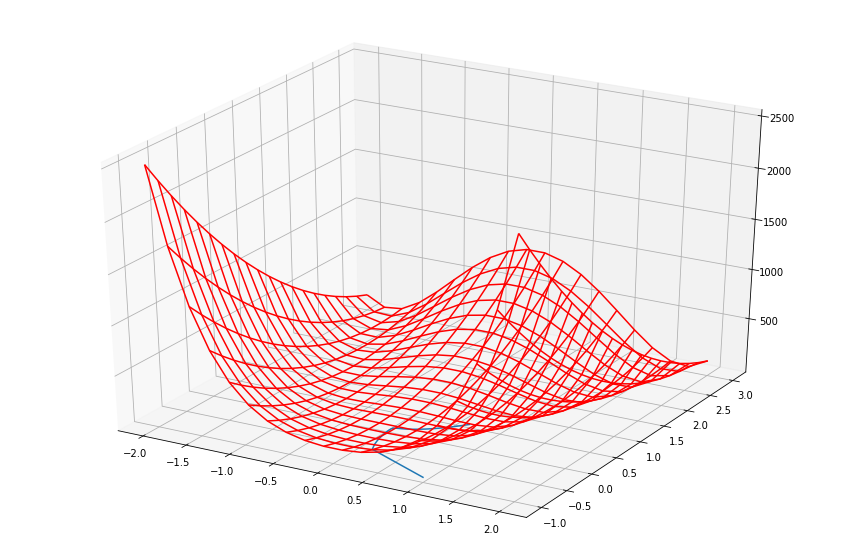

In [ ]:

h = 100*(y_grid - x_grid**2)**2  + (1 - x_grid)**2
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
surf = ax.plot_wireframe(x_grid, y_grid, h, color='red') 
x = gradient_descent(eta=0.001, num_iterations=1000)[0]
y = gradient_descent(eta=0.001, num_iterations=1000)[1]
h = gradient_descent(eta=0.001, num_iterations=1000)[2]

ax.plot(x, y, h)
plt.show()


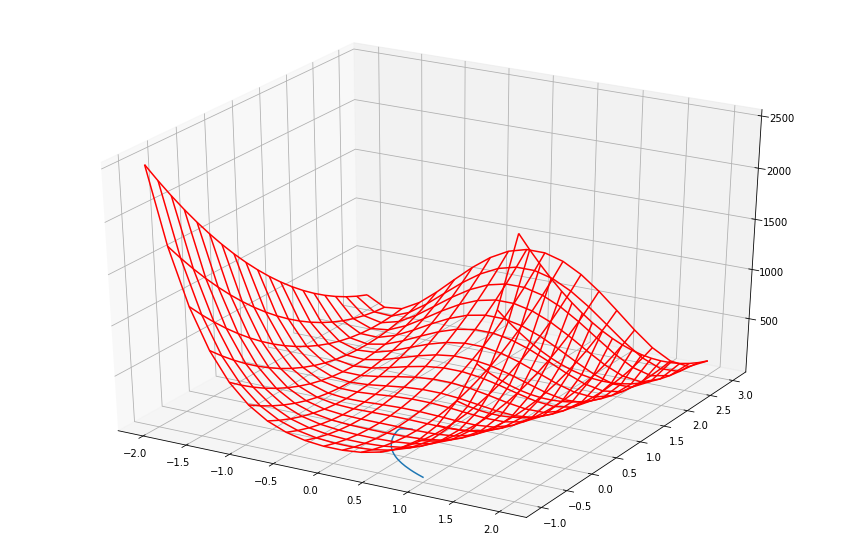

In [ ]:
h = 100*(y_grid - x_grid**2)**2  + (1 - x_grid)**2
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
surf = ax.plot_wireframe(x_grid, y_grid, h, color='red') 
x = gradient_descent(eta=0.0001, num_iterations=1000)[0]
y = gradient_descent(eta=0.0001, num_iterations=1000)[1]
h = gradient_descent(eta=0.0001, num_iterations=1000)[2]

ax.plot(x, y, h)
plt.show()

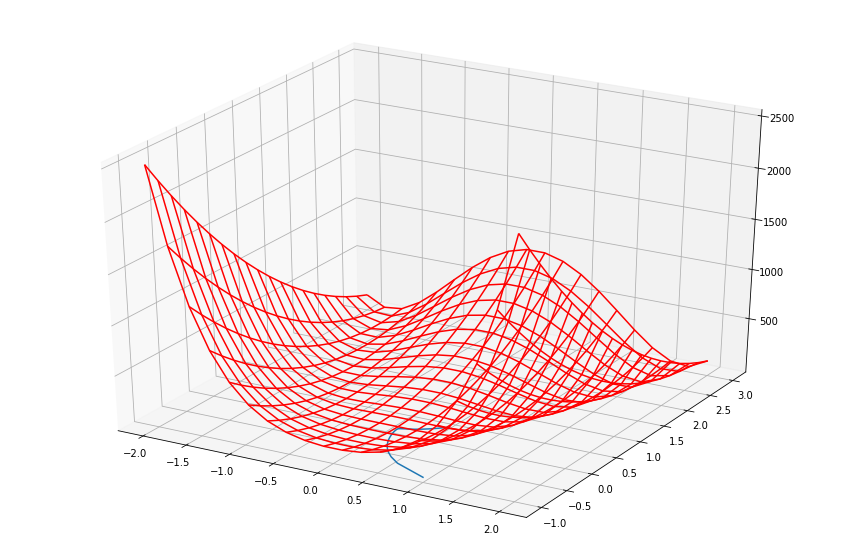

In [ ]:
h = 100*(y_grid - x_grid**2)**2  + (1 - x_grid)**2
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
surf = ax.plot_wireframe(x_grid, y_grid, h, color='red') 
x = gradient_descent(eta=0.0005, num_iterations=1000)[0]
y = gradient_descent(eta=0.0005, num_iterations=1000)[1]
h = gradient_descent(eta=0.0005, num_iterations=1000)[2]

ax.plot(x, y, h)
plt.show()

## Exercise 4: Gaussian process and kernels

Recall the squared exponential kernel introduced in the lecture. 
$$
    \kappa_\mathrm{se}(x,x') = \sigma^2\exp\left(-\frac{(x-x')^2}{2\mathscr{l}^2}\right)
$$

### Question 1

Create a function that computes squared exponential kernel. 

### Answer

In [ ]:
import math
def squared_exponential(x, x_prime, l = 1.0, sigma_sq = 1.0):
    '''
    x -- input vector (N,1)
    x_prime -- input vector (M,1)
    l -- lengthscale hyperparameter
    sigma_sq -- amplitude hyperparameter
    '''    
    return (np.exp((np.square(x-np.transpose(np.array(x_prime))))* (-1/ (2*(l**2))) ))*sigma_sq # K -- compute kernel matrix

In [ ]:
# Take the following inputs and compute kernel matrix
x = np.linspace(-4.,4.,100)[:, None]
x_prime = np.linspace(-4.,4.,100)[:, None]
K = squared_exponential(x, x_prime, l = 1.0, sigma_sq = 1.0)

C:\Users\kavai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


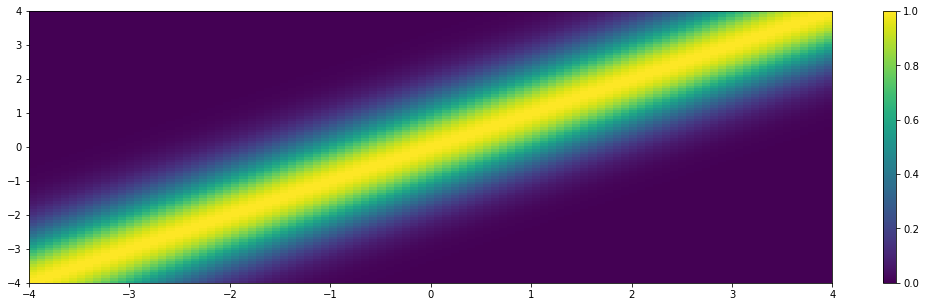

In [ ]:
# Now plot the covariance of the sample space
fig = plt.figure(figsize=(18,5))
plot = plt.pcolor(x_prime.T, x, K)
fig.colorbar(plot)
plt.show()

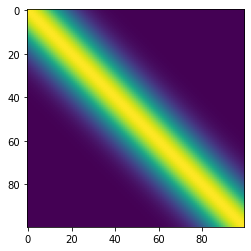

In [ ]:
fig, ax = plt.subplots()
ax.imshow(K)
ax.set_aspect('equal')
plt.show()

### Question 2

What do you notice in the plot of the covariance of the sample space? 

### Answer

Almost all space near corners represent dark blue areas -- areas with 0 covariance. All the elements on the diagonal have covariance = 1. The changing of covariance is not so smoth, it gradually decreases within some interval and then drops abruptly. 

### Question 3

A Gaussian process provides a prior over some infinite-dimensional function, defined by a mean function and covariance function

$$ f(x) \sim \mathcal{GP}(m(x), k(x,x'))$$

When we sample from the covariance function, $k$, to create a matrix over some sample space, we are creating a matrix of values that describe the covariance between sample points. Since it is not possible to sample every single point in an infinite dimensional function, we have to sample a finite subset of the input domain. Let $\mathbf{X}$ denote some sample inputs, and $\mathbf{K}$ the covariance matrix, with elements $K_{ij} = k(\mathbf{X}_i,\mathbf{X}_j)$, then we can describe the prior over $f(\mathbf{X})$ as a (finite-dimensional) normal distribution with covariance $\mathbf{K}$. As such, we can easily create samples of $f$ which, for a good choice of $\mathbf{X}$, are representative of the true function.

We can also sample from the kernel prior by creating a covariance matrix over a sample space and sampling from a zero-mean multivariate normal distribution with covariance $\mathbf{K}$. Below are examples of different kernels with different parameters, including composite kernels.

<p>
Now, take the sample space $\mathbf{X}$ as defined in the cell below. Sample GP prior functions using squared exponential kernel you defined before and plot the GP samples. 
</p>

### Answer

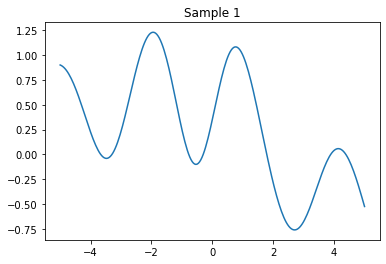

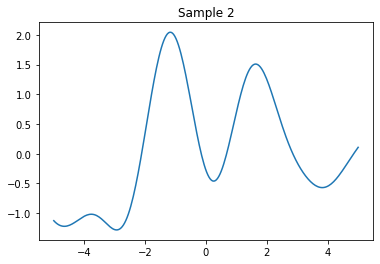

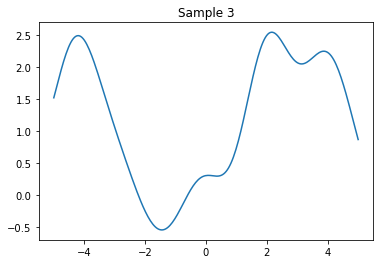

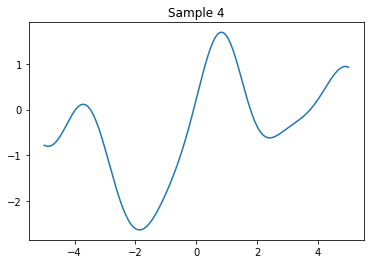

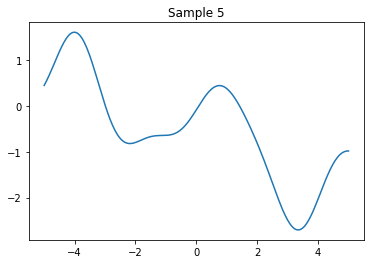

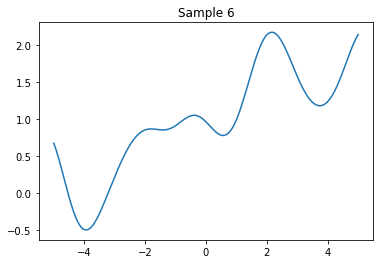

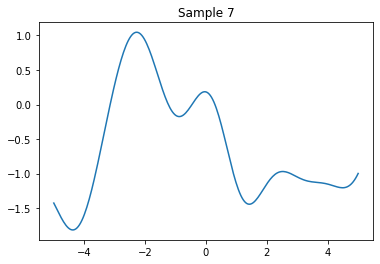

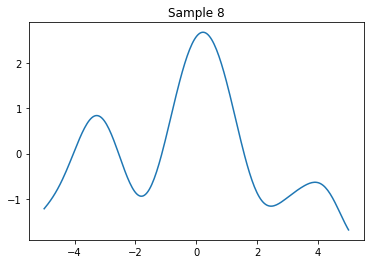

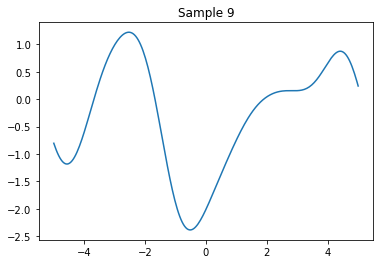

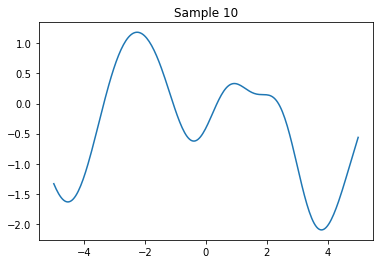

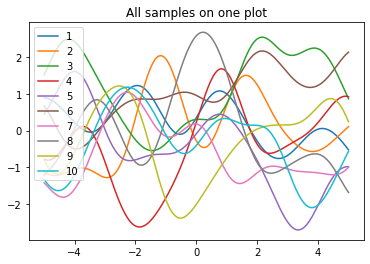

In [ ]:
# Our sample space
X = np.linspace(-5., 5., 250)[:, None]

# Sample 10 GP functions
mean = np.zeros((250,1))
covariance = squared_exponential(X, X, l = 1.0, sigma_sq = 1.0)

GP_samp = np.random.multivariate_normal(mean.flatten(), covariance, 10)
# Plot GP functions
    
# On several plots
for i in [*range(0,10)]:
    plt.plot(X, GP_samp[i])
    plt.title('Sample '+ str(i+1))
    plt.show()
    
# On one plot
for i in [*range(0,10)]:
    plt.plot(X, GP_samp[i])
    plt.legend([*range(1,11)])
    plt.title('All samples on one plot')

Take a different set of the hyperparameters of the kernel (grid defined below), for all the combinations sample 10 GP samples and plot these samples (in separate figures).

In [ ]:
l = np.array([0.1, 0.5, 1.0])
var = np.array([0.1, 0.5, 1.0])

# Sample 10 GP functions for each
dict = {}
for i in l:
    for j in var:
        mean = np.zeros((250,1))
        covariance = squared_exponential(X, X, i, j)
        GP_samp = np.random.multivariate_normal(mean.flatten(), covariance, 10)
        dict[i, j] = GP_samp
        
# grid points for l for which you should compute kernel, sample GP priors and plot these samples
#[l_i, var_i] = np.meshgrid(l,var)

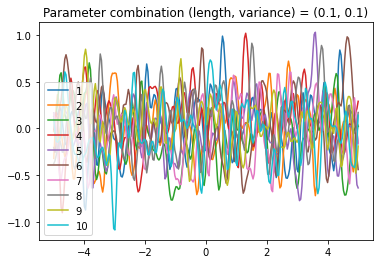

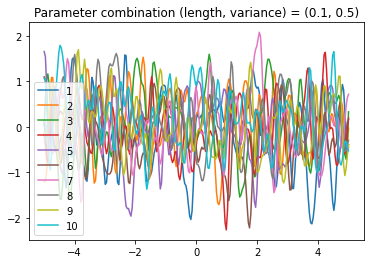

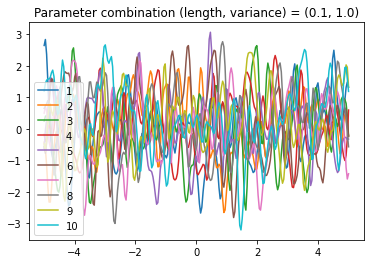

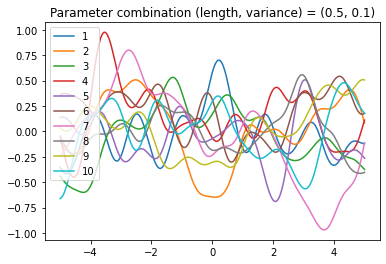

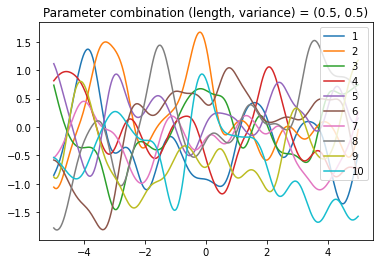

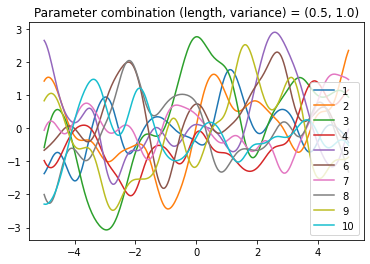

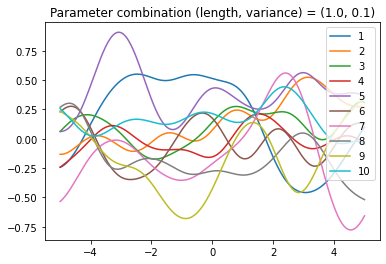

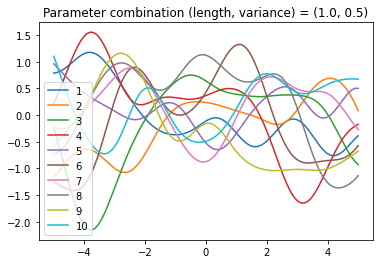

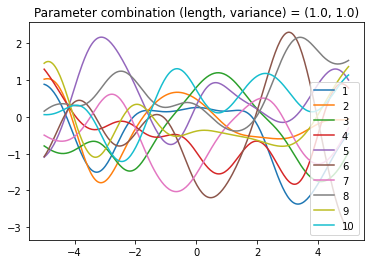

ValueError: x and y must have same first dimension, but have shapes (250, 1) and (100,)

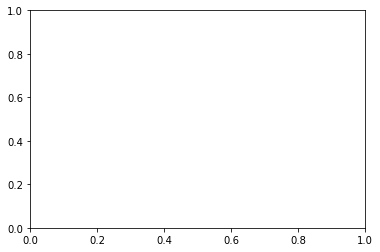

In [ ]:
for key in dict.keys():
    for i in [*range(0,10)]:
        plot_n = plt.plot(X, dict[key][i])
    plt.legend([*range(1,11)])
    plt.title('Parameter combination (length, variance) = '+ str(key))
    plt.show()

### Question 4

Explain what is the effect of different lengthscale and variance hyperparameters on the shape of GP samples. 

### Answer

Variance controls the amplitude;
Lengthscale controls how wigly the function is;

For Lengthscale = 0.1 the function is very narrow and increasing the variance gives bigger amplitude (bigger jumps "up - down");
So, increasing the lengthscale widens our function, increasing the variance gives bigger amplitude (bigger jumps "up - down").

For big lengthscales we should take bigger variances to see really big jumps. So, it's about the proportional relation between lenght and variance. For little lengthscales it is enough to change variances a little to see the difference in amplitudes.

### Question 5

We will consider a different kernel now

$$ k(\mathbf{x}, \mathbf{x}') = \theta_0 \exp\left( - \frac{\theta_1}{2} || \mathbf{x} - \mathbf{x}' ||^2 \right) + \theta_2 + \theta_3 \mathbf{x}^T \mathbf{x}' $$.

Implement this kernel in the cell below. 

### Answer

In [ ]:
def comb_kernel(x, x_prime, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0):
    '''
    x -- input vector (N,1)
    x_prime -- input vector (M,1)
    theta0, theta1, 
    theta2, theta3-- hyperparameters of the kernel
    '''    
    result_1 = ((np.exp( (np.square(x-np.transpose(np.array([x_prime]))))* (-theta1/2)) )* theta0 ) + theta2 + tehta3 * np.dot(x.T, x_prime)

    return result_1 # K -- compute kernel matrix

In [ ]:
# Compute kernel for the following x (DO NOT PRINT IT OUT)
x = np.linspace(-1., 1., 100)
x_prime = np.linspace(-1., 1., 100)

K = comb_kernel(x, x_prime)

### Question 6

What is the dimension of K? How can we show that K is positive semidefinite?

### Answer

In [ ]:
K.ndim #Number of dimensions

2

A matrix is called positive semidefinite if it is symmetric and all its eigenvalues are non-negative.  If all eigenvalues are strictly positive then it is called a positive definite matrix.

Even when K is positive definite, on your computer you might run into numerical issues due to used precision. This can result in eigenvalues that are too small. As a consequence, you can run into issues when sampling from multivariate Gaussian distribution. To avoid this issue you can add a small diagonal term (say, 0.0001) to K. 

Let us consider different combiations of the hyperparameters for this kernel. We define $\theta=(\theta_0, \theta_1, \theta_2, \theta_3)$. Consider the following hyperparameter combinations:

1) $\theta=(1,4,0,0)$\
2) $\theta=(9,4,0,0)$\
3) $\theta=(1,64,0,0)$\
4) $\theta=(1,0.25,0,0)$\
5) $\theta=(1,4,10,0)$\
6) $\theta=(1,4,0,5)$

For all of these combinations 

a) compute kernel matrix K, 

b) sample 10 GP functions and plot them (use separate figure for every parameters combination). 

Explain how different hyperparameters $\theta_0, \theta_1, \theta_2, \theta_3$ affect the shapes of sampled functions. Use the same sample sapce (x) as defined before. 


### Answer

Sample 10 GP functions parameters combination

In [ ]:
thetas_list = [[1,4,0,0], [9,4,0,0], [1,64,0,0], [1,0.25,0,0], [1,4,10,0], [1,4,0,5]]
dict_thetas = {}
for i in thetas_list:
    mean = np.zeros((100,1))
    covariance = comb_kernel(x, x_prime, i[0], i[1], i[2], i[3])
    
    GP_samp = np.random.multivariate_normal(mean.flatten(), covariance, 10)
    dict_thetas[str(i)] = GP_samp

Plot 10 GP functions for each parameters combination

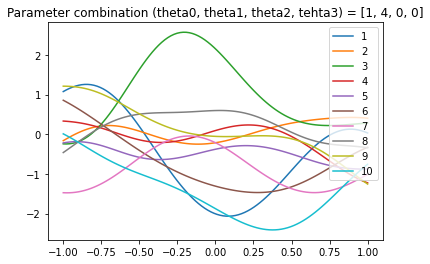

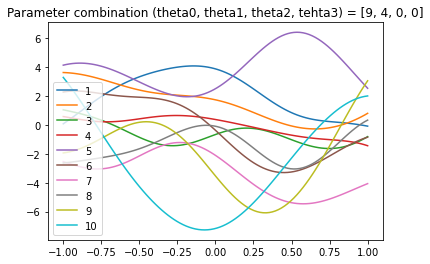

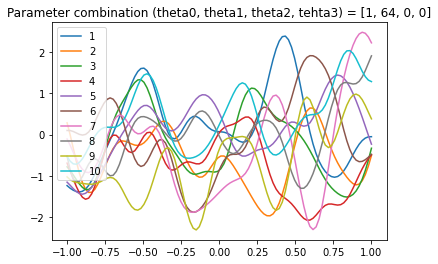

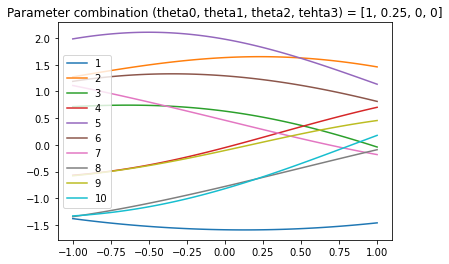

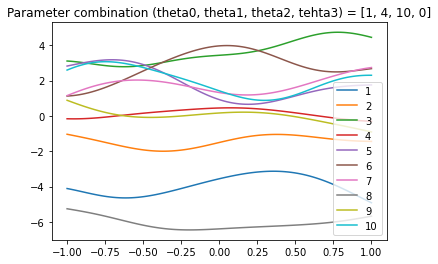

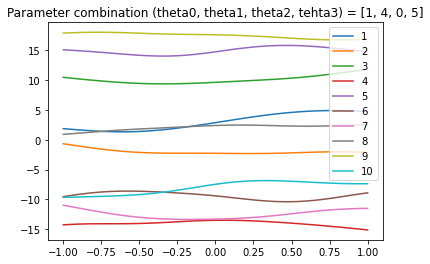

In [ ]:
for key in dict_thetas.keys():
    for i in [*range(0,10)]:
        plt.plot(x, dict_thetas[key][i])
    plt.legend([*range(1,11)])
    plt.title('Parameter combination (theta0, theta1, theta2, tehta3) = '+ key)
    plt.show()

$$ k(\mathbf{x}, \mathbf{x}') = \theta_0 \exp\left( - \frac{\theta_1}{2} || \mathbf{x} - \mathbf{x}' ||^2 \right) + \theta_2 + \theta_3 \mathbf{x}^T \mathbf{x}' $$

Explain how different hyperparameters  $𝜃_0,𝜃_1,𝜃_2,𝜃_3$  affect the shapes of sampled functions.

$𝜃_0$ for the amplitude

$𝜃_1$ controls for the wide of the function

$𝜃_2$ shifts the curve up or down (on the $y$ axis) without changing its shape

$𝜃_3$ also shifts the curve up or down (on the $y$ axis) without changing its shape

### Question 7

Let's assume that we observe four data points:  $(x_1 = -0.5, t_1 = 0.5), (x_2 = 0.2, t_2 = -1), (x_3 = 0.3, t_3 = 3), (x_4 = -0.1, t_4 = -2.5)$.

Let us define a Gaussian process regression as before. 

$$y = f(x) + \epsilon,$$
where $\epsilon \sim N(0, \sigma^{2}_{n}I)$ with $I$ - identity matrix. 

Then the complete model, for both training $x$ and test $x^{\ast}$ data can be written as 

$$\begin{bmatrix}
y\\
f^{\ast}
\end{bmatrix}\sim 
N\left( 0, \begin{bmatrix}
K(x,x) + \sigma^{2}I & K(x, x^{\ast})\\
K(x^{\ast}, x)& K(x^{\ast}, x^{\ast})
\end{bmatrix} \right). $$

If we condition on $y$, training data, we get 

$$f^{\ast}|y, x, x^{\ast} \sim N(\mu^{\ast}, \Sigma^{\ast}), $$, 

where 

$$\mu^{\ast} = K(x^{\ast}, x)[K(x,x)+\sigma^{2}_{n}I]^{-1}y, \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(1)$$

$$\Sigma^{\ast} = K(x^{\ast}, x^{\ast}) - K(x^{\ast}, x) [K(x,x)+\sigma_{n}^{2}I] ^{-1}K(x, x^{\ast}).\,\,\, (2) $$


Assume $\theta=(1,1,1,1)$ and $\sigma^2=1$. Compute $K(x,x) + \sigma^{2}I$ where x are your training points defined in the beginning of the question. 

### Answer

In [ ]:
x = np.array([-0.5, 0.2, 0.3, -0.1])
theta = [1,1,1,1]
sigma_sq = 1

K = comb_kernel(x, x, theta[0], theta[1], theta[2], theta[3])
result = K + sigma_sq*np.identity(len(x))

Define functions that compute correspondinly posterior mean and posterior covariance (equations (1) and (2) above). 

In [ ]:
def posterior_mean(x_train, x_test, sigma_sq, y):
    result_1 = comb_kernel(x_test, x_train, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0)
    
    inside_brackets = comb_kernel(x_train, x_train, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0)+ sigma_sq*np.identity(len(x_train))
    
    inside_reversed = np.linalg.inv(inside_brackets)
    
    result = np.dot(np.dot(result_1, inside_reversed),y)
    
    return result

def posterior_variance(x_train, x_test, sigma_sq):
    result_1 = comb_kernel(x_test, x_test, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0)
    result_2 = comb_kernel(x_test, x_train, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0)
    result_3 = comb_kernel(x_train, x_train, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0)
    result_4 = comb_kernel(x_train, x_test, theta0=1.0, theta1=1.0, theta2=1.0, tehta3=1.0)
    
    inside_brackets = result_3 + sigma_sq*np.identity(len(x_train))
    inside_reversed = np.linalg.inv(inside_brackets)
    
    product_3 = np.dot(np.dot(result_2, inside_reversed), result_4)
    itog = result_1 - product_3
    
    return itog

### Question 8

Compute and plot mean of the posterior distribution (see equation (1)) for the training points x. 

### Answer

In [ ]:
x_train = np.array([-0.5, 0.2, 0.3, -0.1])
x_test = np.linspace(-1., 1., 4)
y = np.array([0.5, -1, 3, -2.5])

posterior_mean = posterior_mean(x_train, x_test, sigma_sq, y)

In [ ]:
x_train, posterior_mean 

(array([-0.5,  0.2,  0.3, -0.1]),
 array([0.87902625, 0.56640853, 0.46576282, 0.78540378]))

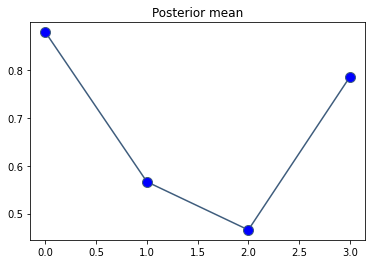

Posterior variance =  [0.87902625 0.56640853 0.46576282 0.78540378]


In [ ]:
plt.plot(posterior_mean, color="#3F5D7D", marker='o', markerfacecolor='blue', markersize=10)
plt.title('Posterior mean')
plt.show()

print('Posterior variance = ', posterior_mean)

### Question 9

Now compute covariance (see equation (2)) and add to the plot confidence intervals. 

### Answer

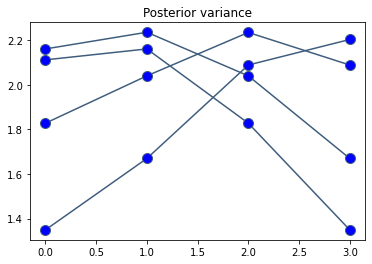

Posterior variance =  [[2.11133985 2.16026859 1.82738895 1.34905757]
 [2.16026859 2.23509323 2.03958929 1.66937964]
 [1.82738895 2.03958929 2.23417685 2.08818091]
 [1.34905757 1.66937964 2.08818091 2.20265756]]


In [ ]:
posterior_cov = posterior_variance(x_train, x_test, sigma_sq)
plt.plot(posterior_cov, color="#3F5D7D", marker='o', markerfacecolor='blue', markersize=10)
plt.title('Posterior variance')
plt.show()

print('Posterior variance = ', posterior_cov)

In [ ]:
sample = np.random.multivariate_normal(posterior_mean.flatten(), posterior_cov, 10)

C:\Users\kavai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


### Question 10 

Explain what equation (1) and (2) represent, what possible 'shapes' could f(x) take?

(YOUR ANSWER HERE)

### Question 11

Now take a new test point x = 0, compute the mean and the covariance of the conditional distribution of a new target value y. What values can y possibly take? 

## Exercise 5: Neural networks

In this exercise we will implement feed-forward function for neural network, backpropagation algorithm for finding gradients, gradient-descent for training neural network and then train the network and interpret the results and performance of the algorithm with different hyperparameters. First let us create data. It will be simply Gaussian distribution, nothing too tricky. 

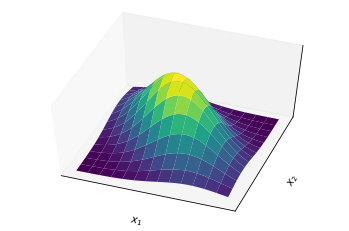

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Our 2-dimensional distribution will be over variables X and Y
N = 40
x1 = np.linspace(-2, 2, N)
x2 = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x1, x2)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z = multivariate_normal.pdf(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax.view_init(55,-70)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

plt.show()

### Question 1

This are dimensions of out network (see the cell below). 

In [ ]:
# Network dimension
d_in = 2      # number of input nodes
d_out = 1     # number of output nodes
d_hidden = 50 # number of nodes in hidden layer

In [ ]:
X_new = np.transpose(np.array([np.concatenate(X.reshape(1, 1600)),np.concatenate(Y.reshape(1, 1600))]))

In the cell below write down the dimensions of $X$, $w_1$, $b_1$,  $w_2$, $b_2$  -- inputs of the feed forward function for neural network.

### Answer
$X$ (2 $\times$ 1), $w_1$ (50 $\times$ 2), $b_1$ (50 $ \times$ 1), $w_2$ (1$\times$50), $b_2$ (1$\times$1)

### Question 2 

Create a feed forward function that outputs the output node of the network for each data point. 

In [ ]:
def feed_forward(X, w1, b1, w2, b2):
    """
    Create the feed forward function with tanh and linear activations.
    
    Parameters
    ----------
    X  : Input data.
    w1 : Weights.
    b1 : Weights.
    w2 : Weights.
    b2 : Weights.
    
    Returns
    -------
    array
        The output node for each data point.
    """
    Z1 = np.dot(w1, X.T) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(w2,A1) + b2
    
    return Z2, A1  # The output node for each data point.

### Question 3

Let us initialize the parameters (weights and biases of the network)

In [ ]:
w1 = np.random.uniform(-1,1,(d_hidden, d_in))
b1 = np.random.uniform(-1,1,(d_hidden, 1))
w2 = np.random.uniform(-1,1,(d_out, d_hidden))
b2 = np.random.uniform(-1,1,(d_out, 1))

Plot initial output of the network

### Answer

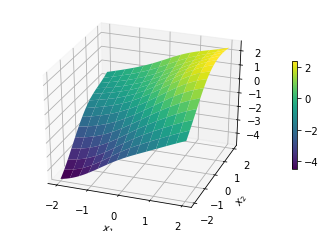

In [ ]:
# plot using subplots
result, A = feed_forward(X_new, w1, b1, w2, b2)
result = result.reshape(40,40)

fig = plt.figure()
ax = fig.gca(projection='3d')

graph = ax.plot_surface(X, Y, result, rstride=3, cstride=3, linewidth=1, antialiased = True,
                cmap=cm.viridis)

ax.view_init(30,-70)
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
cb = fig.colorbar(graph, shrink = 0.5)
plt.show()

### Question 4

Write down equetions for backpropagation algorithm to estimate gradients of the loss for the neural network model. Explain, why it is convenient to compute gradients this way. 

Gradient descent method involves calculating the differential of the squared error function with respect to the network weights. As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $$\frac{\partial{L}}{\partial{W_1}}, \frac{\partial{L}}{\partial{b_1}}, \frac{\partial{L}}{\partial{W_2}}, \frac{\partial{L}}{\partial{b_2}}$$.

Our loss function:
$$ L = \sum_{n} \frac{1}{2} (y_{pred} - y_{real})^2  $$

Applying the  formula we find the following:

$$\frac{\partial{L}}{\partial{W_2}} = \frac{\partial{L}}{\partial{y_{pred}}} \frac{\partial{y_{pred}}}{\partial{w_{2}}} = \sum_{n} (y_{pred} - y_{real}) A_{1} =  \sum_{n} (y_{pred} - y_{real}) tanh(W_{1}x +b_{1}) $$

$$\frac{\partial{L}}{\partial{b_2}} = \frac{\partial{L}}{\partial{y_{pred}}} \frac{\partial{y_{pred}}}{\partial{b_{2}}} = \sum_{n} (y_{pred} - y_{real}) $$

$$\frac{\partial{L}}{\partial{W_1}} = \frac{\partial{L}}{\partial{y_{pred}}} \frac{\partial{y_{pred}}}{\partial{A_{1}}} \frac{\partial{A_{1}}}{\partial{Z_{1}}} \frac{\partial{Z_{1}}}{\partial{W_{1}}} = \sum_{n} (y_{pred} - y_{real}) (1 - A_{1}^2)W_{2} x  = \sum_{n} (y_{pred} - y_{real}) (1 - (tanh(W_{1}x +b_{1}))^2)W_{2}x $$

$$\frac{\partial{L}}{\partial{b_1}} = \frac{\partial{L}}{\partial{y_{pred}}} \frac{\partial{y_{pred}}}{\partial{A_{1}}} \frac{\partial{A_{1}}}{\partial{Z_{1}}} \frac{\partial{Z_{1}}}{\partial{b_{1}}} = \sum_{n} (y_{pred} - y_{real}) (1 - A_{1}^2)W_{2}  = \sum_{n} (y_{pred} - y_{real}) (1 - (tanh(W_{1}x +b_{1}))^2)W_{2}   $$

Backpropagation is used to calculate the steepest direction for descent. This method extends to any variable within a function, and allows us to accurately determine the effect of each variable on the overall result.

### Question 5

Create function that trains neural network using gradient descent. For the computation of gradients use backpropagation rule. Indicate in your code with comments 1) where you are using backpropagation rule; 2) where you are using gradient descent update. Make sure to record loss at every step of the algorithm and output this loss as an array for plotting later. 

In [ ]:
def train_network(X, Y, num_cycles , eta, d_in, d_hidden, d_out, init_w1, init_b1, init_w2, init_b2):
  # Set fixed random seed for reproducibility
    np.random.seed(42)

    loss = []
    cycle = 0
    while cycle < num_cycles:
      Z1 = np.dot(init_w1, X.T) + init_b1
      A = np.tanh(Z1)
      Z2 = np.dot(init_w2,A) + init_b2


      diff = Z2-Y
      loss += [(np.dot([1] * 1600,np.transpose(np.square(diff)))/2)]
      dw1 = np.dot((1-np.square(A)),(X*diff.T))*np.transpose(init_w2)
      dw2 = np.dot(diff,np.transpose(A))
      db1 = np.dot((1-np.square(A)),np.transpose(diff))*np.transpose(init_w2)
      db2 = np.dot([1] * 1600, diff.T)


      init_w1 = init_w1 - dw1 * eta
      init_b1 = init_b1 - db1 * eta
      init_w2 = init_w2 - dw2 * eta
      init_b2 = init_b2 - db2 * eta

      cycle += 1
    Z3 = np.dot(init_w1, X.T) + init_b1
    A2 = np.tanh(Z3)
    Z4 = np.dot(init_w2,A2) + init_b2
    loss += [(np.dot([1] * 1600,np.transpose(np.square(diff)))/2)] 

    w1 = init_w1
    w2 = init_w2 
    b1 = init_b1
    b2 = init_b2
            
    return loss, w1, w2, b1, b2 #loss and optimal weights 

### Question 6

Train the network for a number of training cycles (say 1000) and $\eta$ (learning rate) (0.1) and plot the results. Try to change the parameters (num_cycles, $\eta$) how does that affect convergence of the algorithm? With which parameters does your network train well/does not train at all? Illustrate convergence by plotting the loss over number of iterations (i.e. x axis -- number of iterations, y axis -- loss). 
